In [995]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.ticker as ticker

Laad bestanden

In [996]:
#Load files
location = 'Budel'
modelname = 'Vlen'

results = pd.read_csv(rf'C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\RMSE_all.csv', names = ['sim', 'RMSE', 'xcorlen', 'zcorlen','frac', 'cc'])
best = xr.open_dataset(rf'C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\BestRealizations.nc')
Residuals = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\Residuals_{modelname}.csv", index_col = "Time")
Performance = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\Calibration_Performance_{modelname}.csv")
BestParamsSS = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\BestParams_SS_{modelname}.csv", names = ['param', 'value'], header = 0, index_col = 'param' )
BestParamst = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\BestParams_t_{modelname}.csv", names = ['param', 'value'], header = 0, index_col = 'param' )
ModHeads = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\ModHead_{modelname}.csv", index_col = "Time")
ModHeads.index =  pd.DatetimeIndex(ModHeads.index)
ObsHeads = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\ObsHead_{modelname}.csv", index_col = "Time")
ObsHeads.index =  pd.DatetimeIndex(ObsHeads.index)
ObsWells = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\{location} Output\{modelname}\ObsForCalibration_{modelname}_SS.csv")
RMSE_ref = Performance['RMSE'][0]
KGE_ref = Performance['KGE'][17]
print(RMSE_ref)

0.1219858607248132


In [997]:

K_SS = BestParamsSS[~BestParamsSS.index.str.endswith('b')]
K_SS = 2**K_SS
K_T= 2**BestParamst[~BestParamst.index.str.startswith('SS')]
SS = 10**BestParamst[BestParamst.index.str.startswith('SS')]

Params = pd.concat([K_SS * K_T, SS, BestParamsSS[BestParamsSS.index.str.endswith('b')] ])
Params

value
param             
KIz2      3.677247
KIk2      6.071213
KIz3      0.396398
KIk3      1.278905
KIz4      0.470843
SSz       1.923407
SSk       2.578643
KIz2_ghb -0.675739
KIz3_ghb -2.207133
KIz4_ghb -0.361052

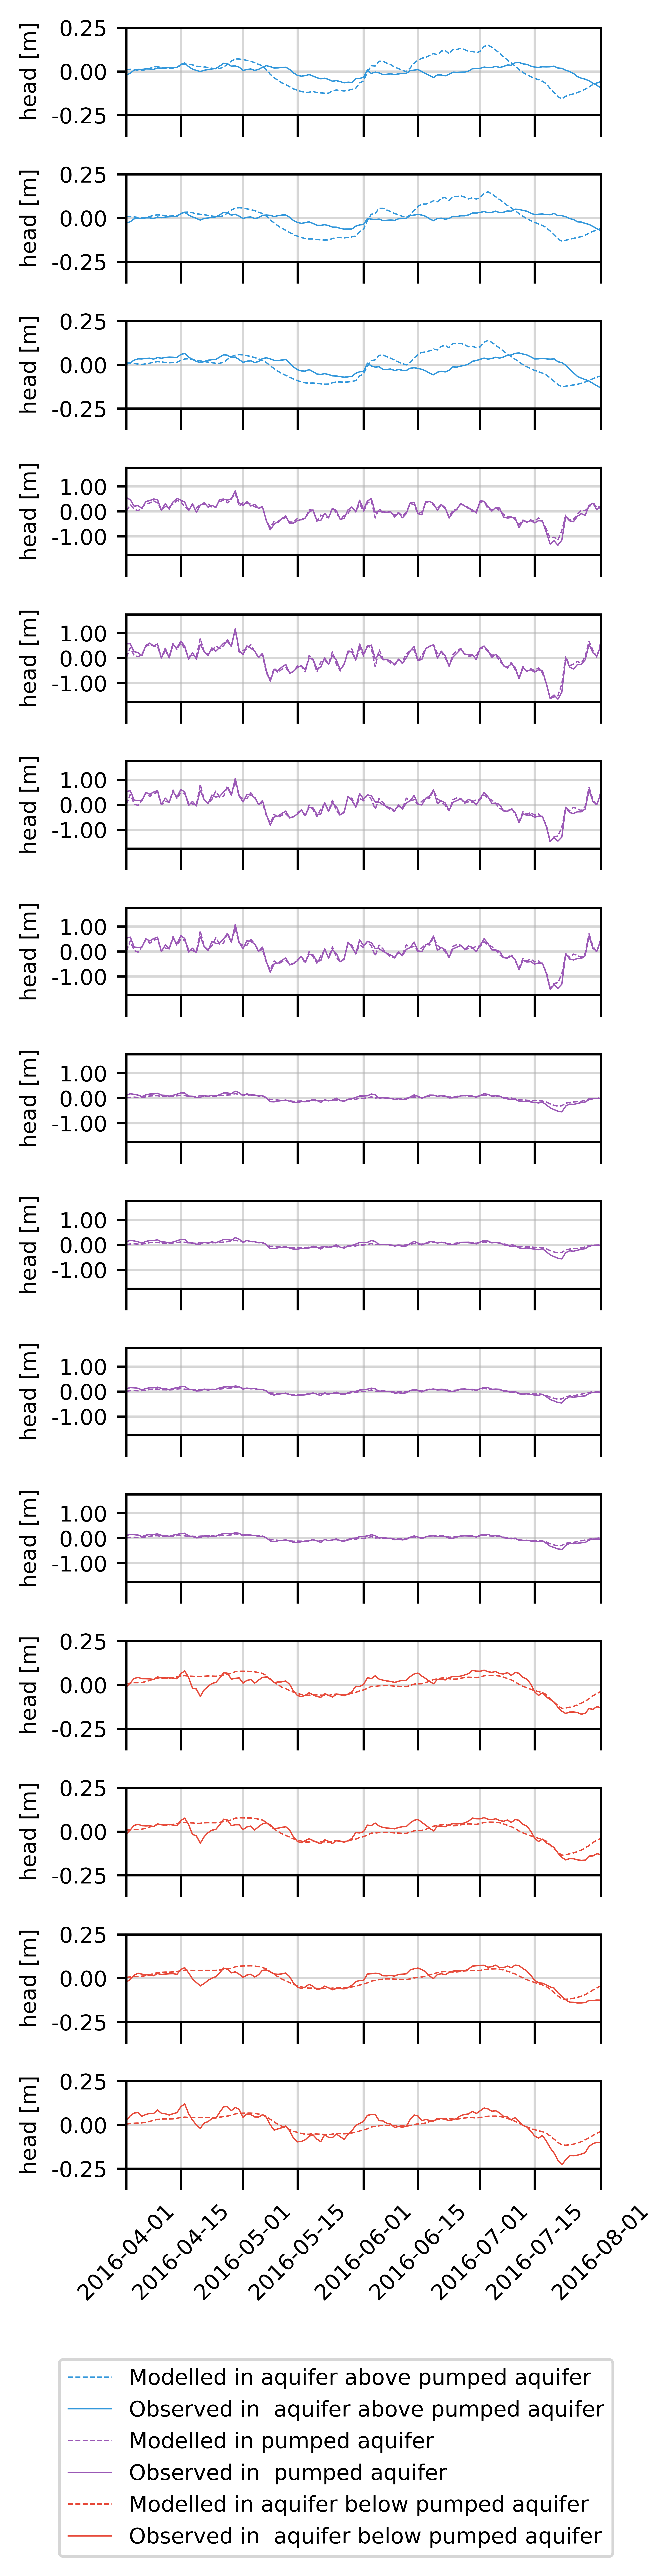

In [998]:
dpi = 1000
pix1 = 3.543
pix2 = 7.480
fig, axes = plt.subplots(len(ModHeads.columns)-1, sharex = True, sharey = False, dpi = dpi)
fig.set_size_inches(pix1,3*4)

id = 0
lays =ObsWells.Layno.unique()

c = {lays[0] : "#3498db",
     lays[1] : "#9b59b6",
     lays[2] : "#e74c3c",
     lays[3] : "#e74c3c"}
legendaxis = []
for idx, lay in enumerate(lays[:-1]):
    dfsel = ModHeads[ObsWells[ObsWells['Layno'] == lay].putcode]
    obssel = ObsHeads[ObsWells[ObsWells['Layno'] == lay].putcode]

    for no,col in enumerate(dfsel.columns):
        ax = axes[id]
        if idx == 0: label = 'aquifer above pumped aquifer'
        elif idx == 1: label = 'pumped aquifer' 
        elif idx == 2 :label = 'aquifer below pumped aquifer'

        ax.plot(dfsel.index, dfsel[col] - dfsel[col].mean(), label=f'Modelled in {label}', linewidth = 0.5, ls = '--', c = c[lays[idx]])
        ax.plot(obssel.index, obssel[col] - obssel[col].mean(), label=f'Observed in  {label}', linewidth = 0.5, c = c[lays[idx]])
        id+=1
        ax.tick_params(axis='x', labelrotation=45, labelsize = 8, size = 8)
        ax.tick_params(axis='y', labelsize = 8)
        ax.set_ylabel('head [m]', size = 8)
        ax.grid(which = 'both', alpha = 0.5)
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
        ax.set_xlim(ModHeads.index[0], ModHeads.index[-1])
        adj = 0.2 if idx == 1 else 0.1
        lim = 1.75 if idx == 1 else 0.25
        ax.set_ylim(-lim, lim)
        # ax.set_ylim(min(dfsel[col]- dfsel[col].mean())-adj, max(dfsel[col]- dfsel[col].mean())+adj)
        if no != 0:
            ax.sharey(axes[id - no])
    legendaxis.append(ax)
lines_labels = [ax.get_legend_handles_labels() for ax in legendaxis]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc = 'lower center', bbox_to_anchor = (0.5,-0.1), fontsize = 8)
        
fig.tight_layout()

In [999]:
resultsBetter[['RMSE','xcorlen','zcorlen', 'frac', 'cc']].corr()

RMSE   xcorlen   zcorlen      frac        cc
RMSE     1.000000 -0.095992  0.047636  0.172257  0.113875
xcorlen -0.095992  1.000000  0.413908 -0.318664  0.191261
zcorlen  0.047636  0.413908  1.000000  0.312313 -0.135579
frac     0.172257 -0.318664  0.312313  1.000000  0.151305
cc       0.113875  0.191261 -0.135579  0.151305  1.000000

Plot RMSE vs KGE

C:\Users\leermdv\AppData\Local\Temp\ipykernel_2616\1769106915.py:8: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  s = resultsBetter.plot.scatter(x = 'RMSE', y = 'KGE', s = 0.5,ax = ax, color = 'black', cmap = 'viridis')
c:\ProgramData\anaconda3\envs\BW\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'KGE [-]')

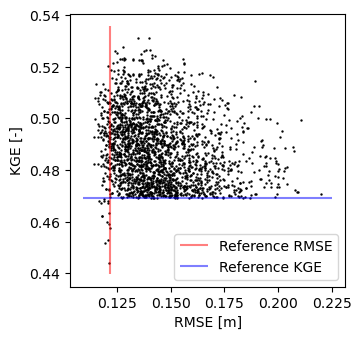

In [1017]:

sel = best.sel(icell2d = 0)
resultsBetter = sel.to_dataframe()
# resultsBetter = resultsBetter[resultsBetter.RMSE < RMSE_ref]
# best = best.where(best.RMSE < RMSE_ref)
fig, ax = plt.subplots()
fig.set_size_inches(pix1, pix1)

s = resultsBetter.plot.scatter(x = 'RMSE', y = 'KGE', s = 0.5,ax = ax, color = 'black', cmap = 'viridis')
ymin, ymax = s.get_ylim()
xmin,xmax = s.get_xlim()
ax.vlines(RMSE_ref, ymin = ymin, ymax = ymax, zorder =  5, alpha = 0.5, color = 'red', label = 'Reference RMSE')
ax.hlines(KGE_ref, xmin = xmin, xmax = xmax, zorder =  5, alpha = 0.5, color = 'blue', label = 'Reference KGE')
ax.legend()
ax.set_xlabel('RMSE [m]')
ax.set_ylabel('KGE [-]')


In [1001]:
results[['RMSE','xcorlen','zcorlen', 'frac', 'cc']].corr()

RMSE       xcorlen       zcorlen          frac            cc
RMSE     1.000000  2.850155e-01 -3.473998e-01  1.777551e-01 -4.928586e-01
xcorlen  0.285016  1.000000e+00 -6.066958e-15  5.333640e-16 -6.510541e-17
zcorlen -0.347400 -6.066958e-15  1.000000e+00  7.918710e-17 -1.389822e-16
frac     0.177755  5.333640e-16  7.918710e-17  1.000000e+00  1.639546e-16
cc      -0.492859 -6.510541e-17 -1.389822e-16  1.639546e-16  1.000000e+00

Plot correlation lengths vs eachother

In [1002]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
def plot_2dhist(results,resultsBetter, col1, col2,axs, letter = None):
    dc = {'xcorlen' : '$L_x$ [m]', 
          'zcorlen' : '$L_z$ [m]',
          'cc' : '$K_{core}$ adjustment [log K]', 
          'frac' : 'Clay fraction adjustment'}
    fulldf = results[[col1, col2]].value_counts().reset_index(name='count')
    fulldf['count'] = 0

    df = resultsBetter[[col1, col2]].value_counts().reset_index(name='count')

    norm = plt.Normalize(0, df['count'].max())
    sc = sns.scatterplot(fulldf,x = col1, y = col2, ax = axs, edgecolor = 'black', facecolors = 'none', s = 100)
    sns.scatterplot(df,x = col1, y = col2, hue = 'count', ax = axs,hue_norm = norm, palette = 'viridis', s= 100, edgecolor = 'black')
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    divider = make_axes_locatable(axs)
    cax = divider.append_axes('right', size='5%', pad=0.05)

    axs.get_legend().remove()
    cbar = axs.figure.colorbar(sm, cax = cax)
    cbar.ax.tick_params(labelsize=10) 
    cbar.ax.set_ylabel('Frequency', fontsize = 10 )
    axs.tick_params(labelsize = 10)
    axs.set_xlabel(dc[col1], fontsize = 10)
    axs.set_ylabel(dc[col2], fontsize = 10)
    axs.set_title(letter, fontsize = 10)
    return axs
# resultsBetter = resultsBetter[resultsBetter.RMSE < RMSE_ref]
fig, axs = plt.subplots(3,2, dpi = 1200)
fig.set_size_inches(pix2,8)
plot_2dhist(results,resultsBetter, 'xcorlen', 'cc', axs[0,0], 'A')
plot_2dhist(results, resultsBetter,'xcorlen', 'zcorlen', axs[1,0], 'C')
plot_2dhist(results, resultsBetter,'xcorlen', 'frac', axs[0,1] ,'B')
plot_2dhist(results, resultsBetter,'cc', 'frac', axs[1,1] ,'D')
plot_2dhist(results, resultsBetter,'cc', 'zcorlen', axs[2,0] ,'E')
plot_2dhist(results, resultsBetter,'frac', 'zcorlen', axs[2,1] ,'F')

axs[0,1].set_yticks([-0.05, 0.0, 0.05])
axs[1,1].set_yticks([-0.05, 0.0, 0.05])
axs[2,1].set_xticks([-0.05, 0.0, 0.05])

fig.tight_layout()



In [1003]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# fig, axs = plt.subplots(len(resultsBetter.cc.unique()), 3, sharex = False)
# fig.set_size_inches(pix2,9)
# cols = [['xcorlen', 'frac'], ['xcorlen', 'zcorlen'], ['frac', 'zcorlen']]
# for no2, col in enumerate(cols):
#     for no,cc in enumerate((np.sort(resultsBetter.cc.unique()))):
#         #get counts
#         fulldf = results[col].value_counts().reset_index(name='count')
#         fulldf['count'] = 0
#         sel = resultsBetter[resultsBetter.cc == cc]
#         df = sel[col].value_counts().reset_index(name='count')
#         if no2 == 0:
#             norm = plt.Normalize(0, 63)
#             axs[no,no2].set_xlabel('$L_x$')
#             axs[no,no2].set_ylabel('Clay fraction adjustment')
#         elif no2 == 1:
#             norm = plt.Normalize(0, 60)
#             axs[no,no2].set_xlabel('$L_x$')
#             axs[no,no2].set_ylabel('$L_v$')
#         else: 
#             norm = plt.Normalize(0, 120)
#             axs[no,no2].set_xlabel('Clay fraction adjustment')
#             axs[no,no2].set_ylabel('$L_v$')
#         sc = sns.scatterplot(fulldf,x = col[0], y = col[1], ax = axs[no,no2], edgecolor = 'black', facecolors = 'none', s = 100)
#         sns.scatterplot(df,x = col[0], y = col[1], hue = 'count', ax = axs[no,no2],hue_norm = norm, palette = 'viridis', s= 100, edgecolor = 'black')
#         sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
#         sm.set_array([])
#         divider = make_axes_locatable(axs[no,no2])
#         cax = divider.append_axes('right', size='5%', pad=0.05)
#         axs[no,no2].get_legend().remove()
#         axs[no,no2].figure.colorbar(sm, cax = cax)


#         # axs[no,no2].set_title(f'K adjustment = {cc}', fontsize = 8)
#         if no2 ==  0:
#             axs[no,no2].set_xlabel('$L_x$', fontsize = 8)
#             axs[no,no2].set_ylabel('Clay fraction adjustment', fontsize = 8)
#         elif no2 == 1:
#             axs[no,no2].set_xlabel('$L_x$', fontsize = 8)
#             axs[no,no2].set_ylabel('$L_v$', fontsize = 8)
#         else: 
#             axs[no,no2].set_xlabel('Clay fraction adjustment', fontsize = 8)
#             axs[no,no2].set_ylabel('$L_v$', fontsize = 8)

#         # axs[no].set_yticks([4,8,12,16])
#         # axs[no].set_ylim([3,17])

# fig.tight_layout()

In [1004]:
resultsBetter[['xcorlen','zcorlen','cc', 'frac']].corr()

xcorlen   zcorlen        cc      frac
xcorlen  1.000000  0.462505  0.200137 -0.227461
zcorlen  0.462505  1.000000 -0.184748  0.224957
cc       0.200137 -0.184748  1.000000  0.119064
frac    -0.227461  0.224957  0.119064  1.000000

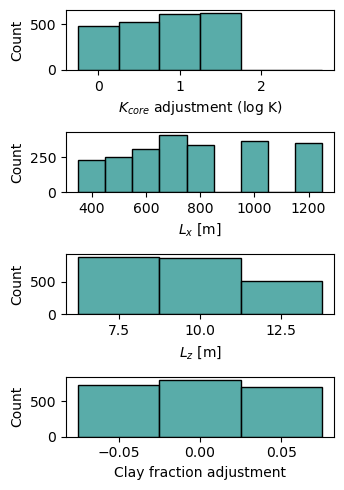

In [1032]:
fig, ax = plt.subplots(4)
fig.set_size_inches(pix1,5)

import matplotlib as mpl
cm = mpl.colormaps.get_cmap('viridis')
histdf = resultsBetter
bins_cc = [-0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75]
bins_xcorlen = [350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250]
bins_zcorlen = bin_edges = [6.25, 8.75, 11.25, 13.75]
bins_frac = [-0.075, -0.025, 0.025, 0.075]

sns.histplot(histdf, x = 'cc', ax = ax[0], color= cm(0.5), bins = bins_cc)
sns.histplot(histdf, x = 'xcorlen', ax = ax[1],  color= cm(0.5), bins = bins_xcorlen)
sns.histplot(histdf, x = 'zcorlen', ax = ax[2],  color= cm(0.5), bins = bins_zcorlen)
sns.histplot(histdf, x = 'frac', ax = ax[3],  color= cm(0.5), bins = bins_frac,)

ax[0].set_xlabel('$K_{core}$ adjustment (log K)')
ax[1].set_xlabel('$L_x$ [m]')
ax[2].set_xlabel('$L_z$ [m]')
ax[3].set_xlabel('Clay fraction adjustment')
ax[2].set_xticks([7.5, 10, 12.5])
fig.tight_layout()

In [1006]:
# best.frac.min()
def reduce_constant_variables(ds):
    reduced_ds = ds.copy()  # Work on a copy of the dataset
    
    for var in ds.data_vars:
            # Check if the variable has the same value along this dimension
            if var != 'k':
                reduced_ds[var] = reduced_ds[var].mean(dim = 'icell2d')
    
    return reduced_ds
best = reduce_constant_variables(best)


Iteration with smallest change: 11


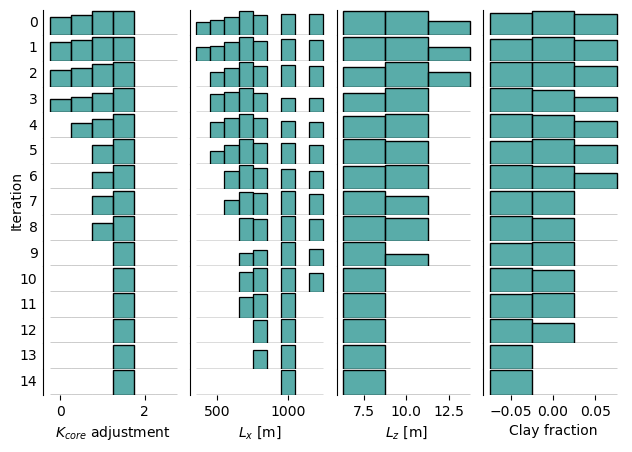

In [1039]:
def makefig(ds, ax, it, bins, its):
    histdf = ds#[['cc', 'xcorlen', 'zcorlen', 'frac']].to_dataframe().astype('string')
    sns.histplot(histdf, x = 'cc', ax = ax[it,0], color= cm(0.5), bins =bins[0])
    sns.histplot(histdf, x = 'xcorlen', ax = ax[it,1], color= cm(0.5), bins = bins[1])
    sns.histplot(histdf, x = 'zcorlen', ax = ax[it,2],  color= cm(0.5), bins = bins[2])
    sns.histplot(histdf, x = 'frac', ax = ax[it,3],  color= cm(0.5), bins = bins[3])

    ax[it,0].set_xlabel('$K_{core}$ adjustment')
    ax[it,1].set_xlabel('$L_x$ [m]')
    ax[it,2].set_xlabel('$L_z$ [m]')
    ax[it,3].set_xlabel('Clay fraction')
    ax[it,2].set_xticks([7.5, 10.0, 12.5])
    
    for no1 in range(4):
        for no2 in range(its+1):
            if no2 != its:
                ax[no2,no1].set_xlabel('')
                ax[no2,no1].set_xticklabels('')
                ax[no2,no1].set_xticks([])

            if no1 != 0:
                ax[no2,no1].set_yticks([])
            ax[no2,no1].set_yticklabels('')
    return ax 

def prune(ds, it, minit, mintotal):
    cols = ['cc','xcorlen', 'zcorlen', 'frac']
    min = 1
    for col in cols:
        counts = ds[col].to_dataframe().value_counts()
        if  counts.min()/max(counts) < min:
            min = counts.min()/max(counts)
            mincol = col
            mincounts = counts.copy()
            minval = mincounts[mincounts == counts.min()].index[0]
    if min > mintotal:
        mintotal = min
        minit = it
    ds = ds.where(ds[mincol] != minval, drop = False)
    return ds, minit, mintotal
            
bestopt_temp = best.copy(deep = True)
its = 14

fig, ax = plt.subplots(its+1,4, sharey = False)
fig.set_size_inches(pix2,5)
bins_cc = [-0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75]
bins_xcorlen = [350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250]
bins_zcorlen = bin_edges = [6.25, 8.75, 11.25, 13.75]
bins_frac = [-0.075, -0.025, 0.025, 0.075]
bins = [bins_cc, bins_xcorlen, bins_zcorlen, bins_frac]
ax = makefig(bestopt_temp, ax, 0, bins, its)
minit = 0
mintotal = 0
for it in range(its):
    bestopt_temp, minit, mintotal = prune(bestopt_temp, it, minit, mintotal)
    ax = makefig(bestopt_temp, ax, it+1, bins, its)
fig.subplots_adjust(hspace=0.0, wspace = 0.05)
for x in range(its+1):
        ax[x,0].set_ylabel(x, rotation = 0, fontsize = 10, va = 'center', ha = 'right')
        for y in range(1,4):
            ax[x,y].set_ylabel('')
        for y in range(4):
            ax[x,y].spines['top'].set_visible(False)
            ax[x,y].spines['right'].set_visible(False)
            # ax[x,y].spines['left'].set_visible(False)
            ax[x,y].spines['bottom'].set_visible(False)
            ax[x,y].set_yticks([])
fig.text(0.09, 0.5, 'Iteration', ha='center', va='center', rotation='vertical')
print(f'Iteration with smallest change: {minit}')

bestopt_nans = best.copy(deep = True)
minit2 = 0
mintotal2 = 0
for it in range(minit):
    bestopt_nans, minit2, mintotal2 = prune(bestopt_nans, it, minit2, mintotal2)
bestopt = bestopt_nans.dropna(dim = 'index')

C:\Users\leermdv\AppData\Local\Temp\ipykernel_2616\2900310140.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


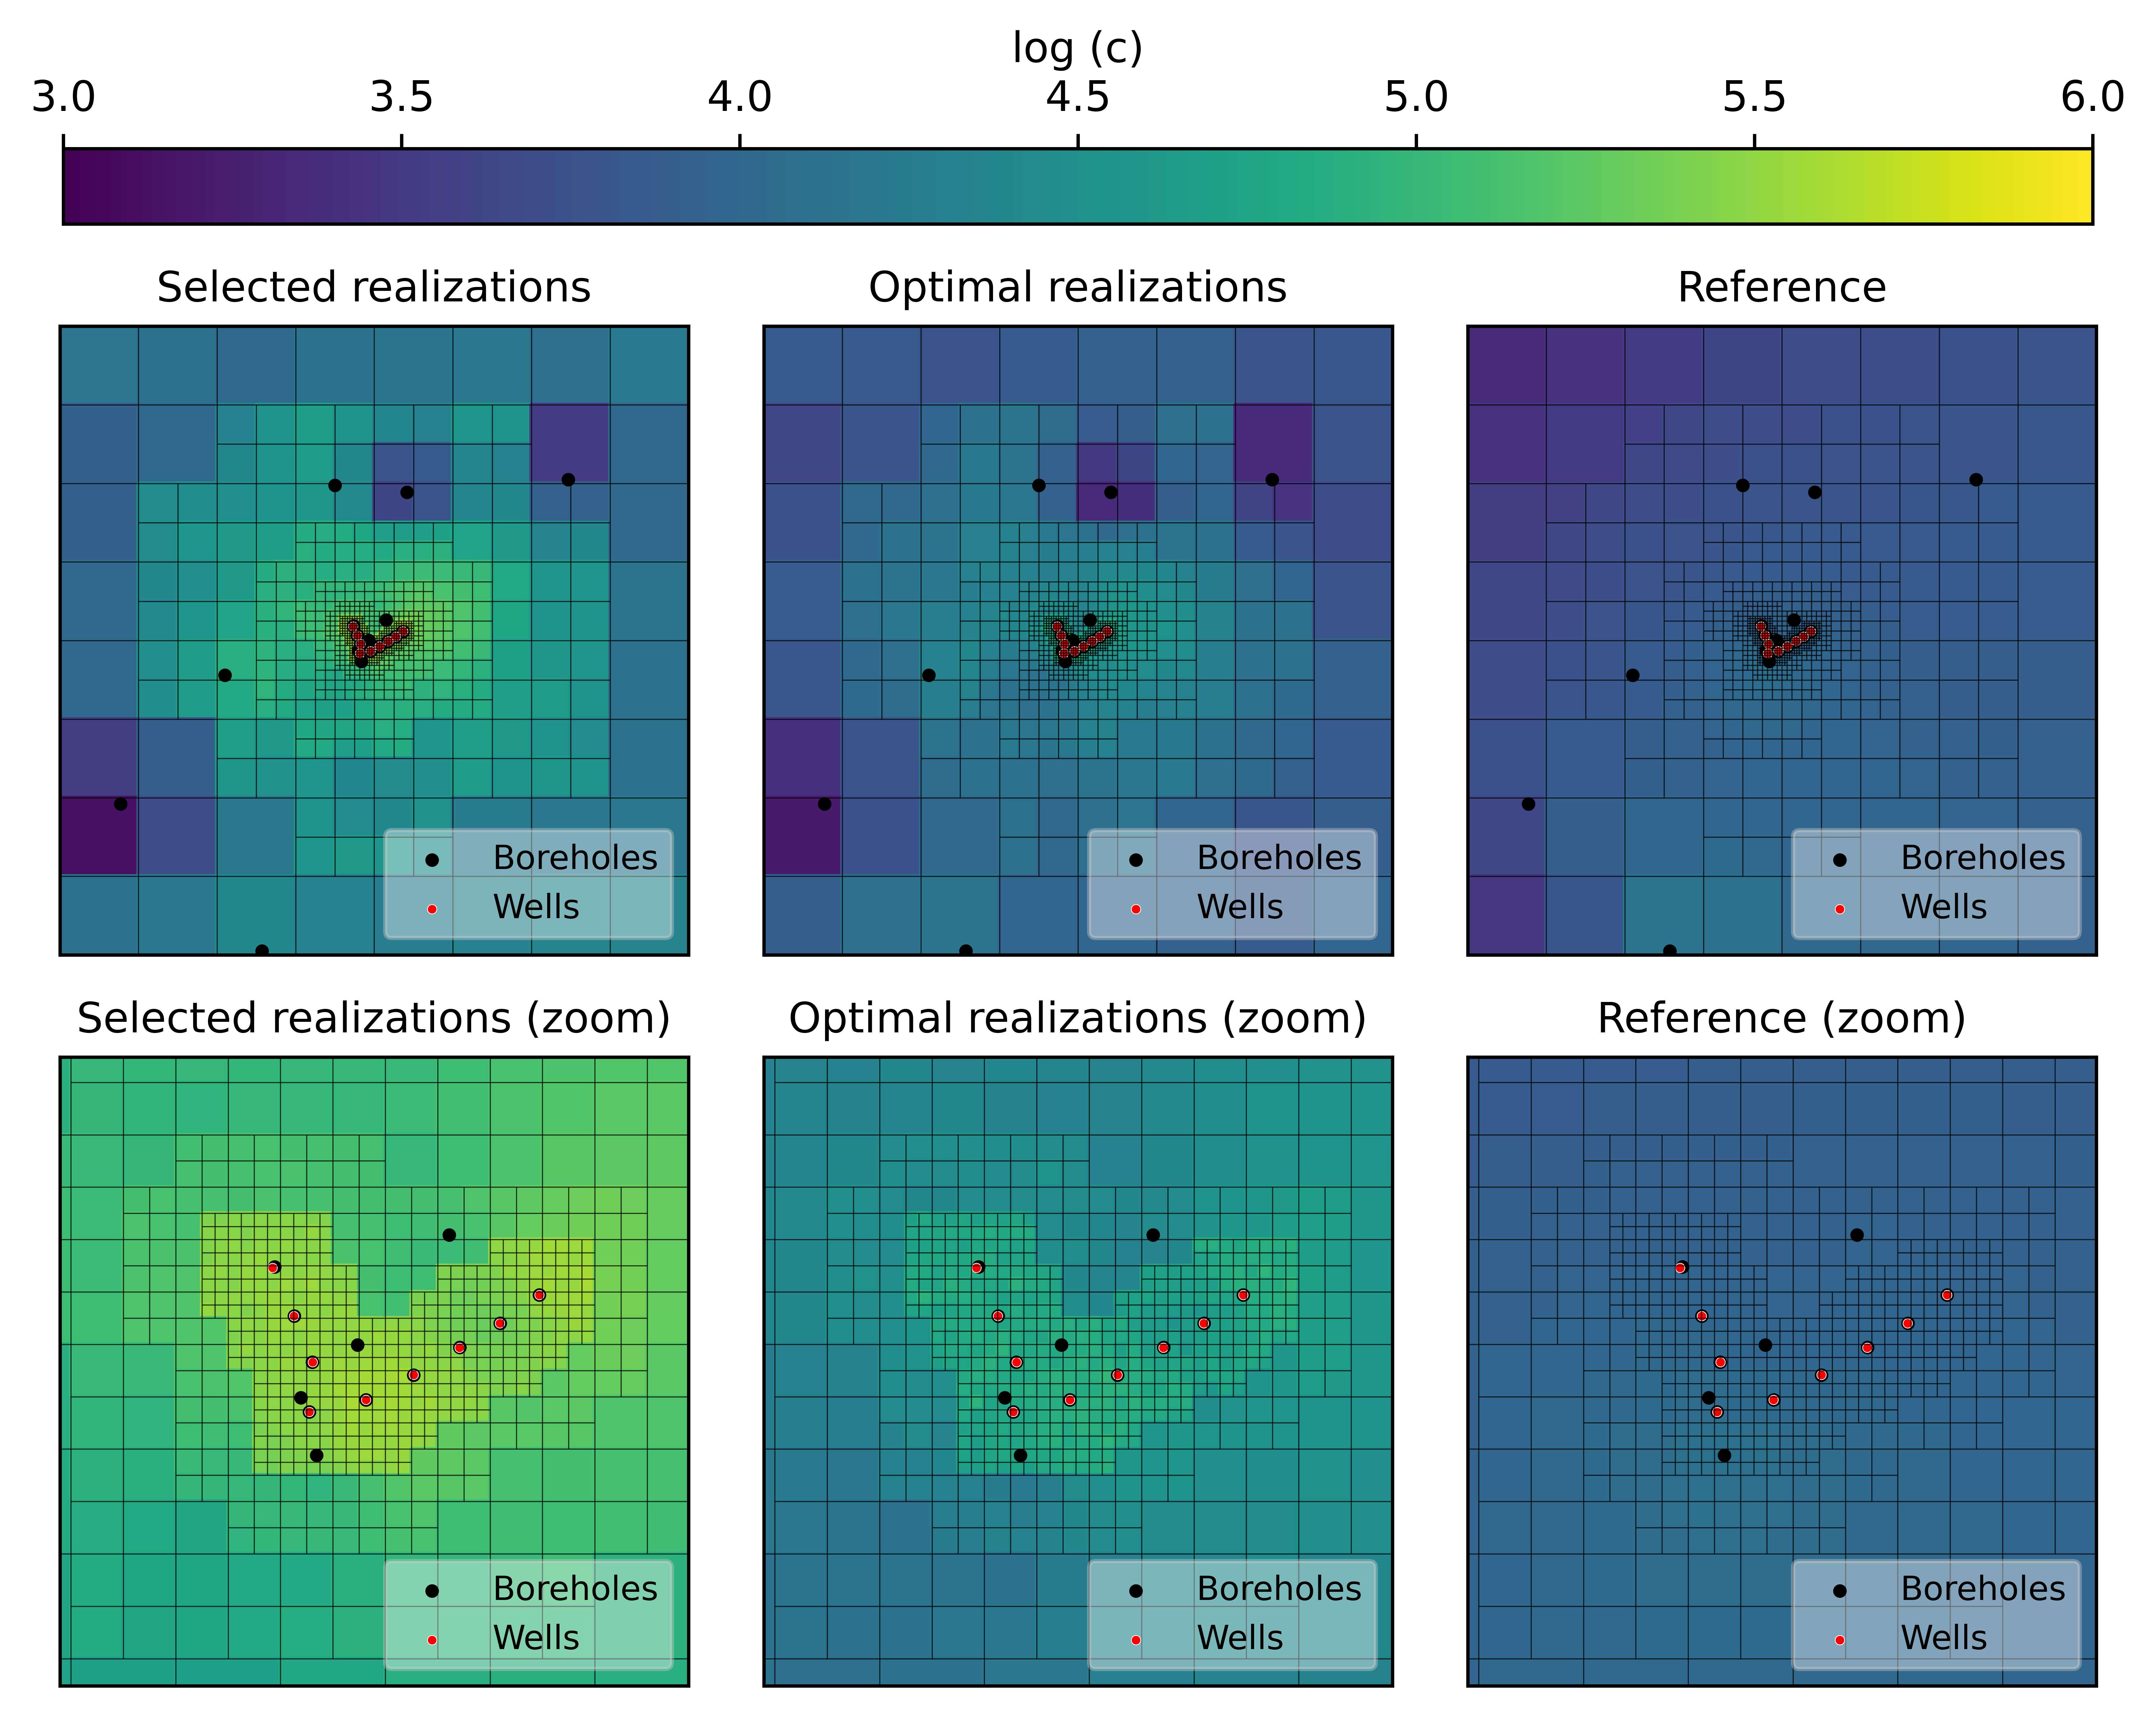

In [1008]:
import nlmod
import xarray as xr
import os 

fig, axs = plt.subplots(2,3,dpi = 1000)
fig.set_size_inches(pix2,5)
ds = xr.open_dataset(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\Budel Output\{modelname}\{modelname}_ss\{modelname}_ss.nc")
ExWells = pd.read_csv(os.path.join('..','Data','dawaco',f'winputten_WG_Budel.csv'))

bestopt
def geometric_mean(values):
    return np.exp(np.log(values).mean())

geo_mean = xr.apply_ufunc(geometric_mean, best, input_core_dims =[['index']], vectorize = True)
geo_mean_opt = xr.apply_ufunc(geometric_mean, bestopt, input_core_dims =[['index']], vectorize = True)
ds['meanbestKV'] = geo_mean.k
ds['meanbestKV_opt'] = geo_mean_opt.k

d =  -(ds.isel(layer = list(ds.layer).index('KIk2')).botm - ds.isel(layer = list(ds.layer).index('KIk2') -1).botm)
c = d/(ds.sel(layer = 'KIk2').kv * Params.loc['KIk2'].values)
vmin = 3
vmax = 6
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)
nlmod.plot.map_array(np.log10(ds.meanbestKV), ds = ds, ax = axs[0,0], colorbar = False, colorbar_label = '$log(c)$', title = 'Selected realizations', plot_grid = True, vmin = vmin, vmax = vmax)
nlmod.plot.map_array(np.log10(ds.meanbestKV), ds = ds, ax = axs[1,0], colorbar = False, colorbar_label = '$log(c)$ [days]', title = 'Selected realizations (zoom)', plot_grid = True, vmin = vmin, vmax = vmax)
nlmod.plot.map_array(np.log10(ds.meanbestKV_opt), ds = ds, ax = axs[0,1], colorbar = False, colorbar_label = '$log(c)$', title = 'Optimal realizations', plot_grid = True, vmin = vmin, vmax = vmax)
nlmod.plot.map_array(np.log10(ds.meanbestKV_opt), ds = ds, ax = axs[1,1], colorbar = False, colorbar_label = '$log(c)$ [days]', title = 'Optimal realizations (zoom)', plot_grid = True, vmin = vmin, vmax = vmax)
nlmod.plot.map_array(np.log10(c), ds = ds, ax = axs[0,2], colorbar = False, colorbar_label = '$log(c)$ [days]', title = 'Kv', plot_grid = True, vmin = vmin, vmax = vmax)
nlmod.plot.map_array(np.log10(c), ds = ds, ax = axs[1,2], colorbar = False, colorbar_label = '$log(c)$ [days]', title = 'Kv', plot_grid = True, vmin = vmin, vmax = vmax)
cbar_ax = fig.add_axes([0.05, 1, 0.9, 0.05])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('log (c)', )
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
fig.subplots_adjust(right=0.95,left = 0.05,bottom = 0.2, hspace=0.2, wspace=0.2)
for x in [0,1]:
    for y in [0,1,2]:
        axs[x,y].scatter(boringen.metadata.loc['X-coordinaat (m)'].astype('float'), boringen.metadata.loc['Y-coordinaat (m)'].astype('float'),color = 'black', label = 'Boreholes', s=5)
        sns.scatterplot(ExWells,  x='x_coordinaat', y = 'y_coordinaat', ax = axs[x,y], c = 'red', s = 5, label = 'Wells')

        axs[x,y].set_xticks([])
        axs[x,y].set_yticks([])
        axs[x,y].set_ylabel('')
        axs[x,y].set_xlabel('')
        axs[x,y].set_aspect('equal')
        axs[1,y].set_xlim([168300, 169500])
        axs[1,y].set_ylim([366100, 367300])
        axs[x,y].title.set_size(10)
        axs[x,y].legend(fontsize = 8, framealpha = 0.4, loc = 'lower right')
        
axs[0,2].set_title("Reference", fontsize = 10)
axs[1,2].set_title("Reference (zoom)",fontsize = 10)


fig.tight_layout()

In [1009]:
import nlmod
import xarray as xr
import os 

num = 3
fig, axs = plt.subplots(3,num, dpi = 1000)
fig.set_size_inches(pix2,pix2)


sample = bestopt.sortby('RMSE')
sample = bestopt.isel(index = slice(0,5))
vmin =3
vmax = 6
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)

for i,x in enumerate(range(num)):
    sel = sample.isel(index = x)
    ds[x] = np.log10(sel.k)
    cb = True if i == 4 else False
    a  = nlmod.plot.map_array(ds[x], ds = ds, ax = axs[0,i], colorbar = False , colorbar_label = '$c$ [days]', title = f'{int(sel.sim.values)},{int(sel.xcorlen.values)}, {int(sel.zcorlen.values)}, {int(sel.frac.values)}, {int(sel.cc.values)}', plot_grid = True, vmin = vmin, vmax = vmax)
    b = nlmod.plot.map_array(ds[x], ds = ds, ax = axs[1,i], colorbar = False, colorbar_label = '$c$ [days]', title = None, plot_grid = True, vmin = vmin, vmax = vmax)
    if i ==0:
        _,bins,_ = np.log10(sel.k).plot.hist(ax = axs[2,i], bins = np.linspace(vmin,vmax, 50),xlim = (vmin, vmax),ylim = (0, 150), edgecolor = 'black', color = cm(0.5))
    else:
        np.log10(sel.k).plot.hist(ax = axs[2,i], bins = bins,xlim = (vmin, vmax), ylim = (0, 150), edgecolor = 'black', color = cm(0.5) )
p0 = axs[0,0].get_position().get_points().flatten()
p1 = axs[0,-1].get_position().get_points().flatten()
# cbar_ax = fig.add_axes([p0[0], 1, p1[2]-p0[0], 0.05])
cbar_ax = fig.add_axes([0.05, 1, 0.9, 0.05])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('log (c)', )
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
fig.subplots_adjust(right=0.95,left = 0.05,bottom = 0.2, hspace=0.2, wspace=0.2)

alf = {0 : 'a', 1 : 'b', 2 : 'c'}
for y in range(num):
    for x in [0,1,2]:

        if x in [0,1]:
            axs[x,y].scatter(boringen.metadata.loc['X-coordinaat (m)'].astype('float'), boringen.metadata.loc['Y-coordinaat (m)'].astype('float'),color = 'black', label = 'Boreholes', s=5)
            sns.scatterplot(ExWells,  x='x_coordinaat', y = 'y_coordinaat', ax = axs[x,y], c = 'red', s = 5, label = 'Wells')
            axs[x,y].set_xticks([])
            axs[x,y].set_yticks([])
            axs[x,y].set_ylabel('')
            axs[x,y].set_xlabel('')
            axs[1,y].set_xlim([168300, 169500])
            axs[1,y].set_ylim([366100, 367300])
            axs[x,y].set_aspect('equal')
            axs[x,y].legend(fontsize = 8, framealpha = 0.4, loc = 'lower right')
        axs[x,y].set_title('')
        axs[x,y].text(0.05, 0.95, f'{y+1}{alf[x]}', transform=axs[x,y].transAxes, fontsize=12,verticalalignment='top')
    axs[2,y].set_aspect(1.0/axs[2,y].get_data_ratio(), adjustable='box')
    axs[2,y].set_xlabel('log(c)')
    sel = sample.isel(index = y)
    # p0 = axs[x,y].get_position().get_points().flatten()
    # msg = f'$L_x$: {int(sel.xcorlen.values)}m\n$L_z$: {int(sel.zcorlen.values)}m\nClay fraction: {sel.frac.values:.2f}\nCore log(K): +{int(sel.cc.values)}'
    # props = dict( facecolor='white', alpha=0.8)
    # fig.text(p0[0]+0.005,0.08,msg ,fontsize  = 8, bbox = props)


# fig.tight_layout()

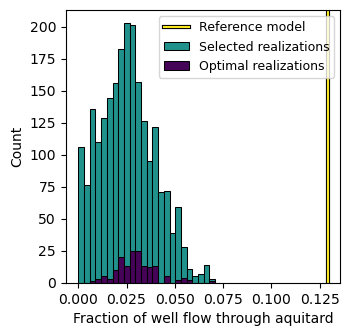

In [1010]:
import seaborn as sns
import matplotlib.patheffects as pe
flowfrac = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\Budel Output\{modelname}\flowfrac.csv")
dist = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\Budel Output\{modelname}\TT_dist.csv")
fig, ax = plt.subplots()
fig.set_size_inches(pix1, pix1)
real = flowfrac[flowfrac.Realization == 'Realizations']
bins =  np.histogram_bin_edges(real.Flowfrac, bins = 'auto')
h = sns.histplot(data = real, x = 'Flowfrac', ax= ax, label = 'Selected realizations', color = cm(0.5), bins = bins, alpha = 1)

sns.histplot(data = real[bestopt_nans.cc.values == 1.5],x = 'Flowfrac', ax= ax, label = 'Optimal realizations', color =cm(0.01), bins = bins, alpha = 1)
ax.axvline(flowfrac[flowfrac.Realization == 'Reference'].Flowfrac.values[0], label = 'Reference model', color = cm(0.99),path_effects=[pe.Stroke(linewidth=3, foreground='black'), pe.Normal()])
ax.set_xlabel('Fraction of well flow through aquitard')
ax.legend(loc = 'upper right', fontsize = 9)



[None]

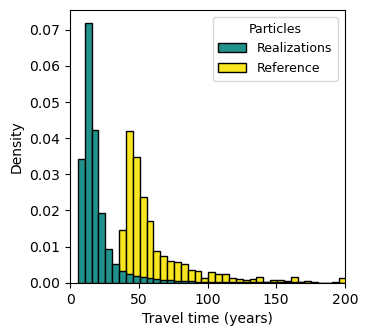

In [1011]:
import seaborn as sns
import matplotlib.pyplot as plt 
dist = pd.read_csv(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\Budel Output\{modelname}\TT_dist.csv")
fig, ax = plt.subplots()
fig.set_size_inches(pix1, pix1)

h = sns.histplot(data = dist, x = 'dist', hue = 'Realization', stat="density", common_norm=False, ax = ax, binwidth =5,  ec = 'black', linewidth = 1, palette = [cm(0.5), cm(0.99)], alpha = 1)
ax.set_xlim((0,200))
ax.set_xlabel('Travel time (years)')
h.get_legend().set_title('Particles')
plt.setp(h.get_legend().get_texts(), fontsize=9)
plt.setp(h.get_legend().get_title(), fontsize=9) 

Frac = 0.6081871345029239


c:\ProgramData\anaconda3\envs\BW\Lib\site-packages\gstools\covmodel\plot.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5]


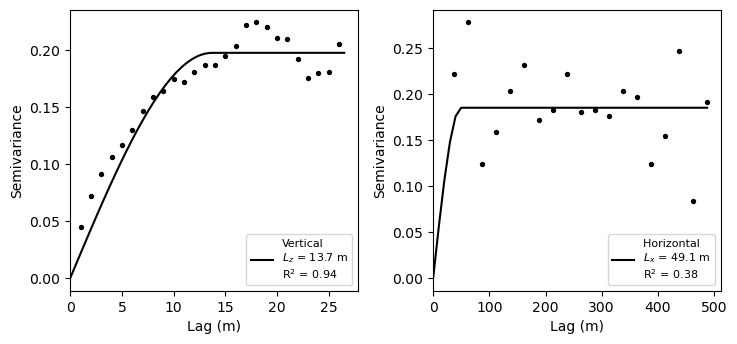

In [1204]:
#%%
import gstools as gs
import pandas as pd 
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open(rf"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Results\Budel Output\{modelname}\boreholeindicators.pkl", 'rb') as f:
    boringen = pickle.load(f)
ls = boringen.list
frac = ls.i[ls.i > 0.5].count()/len(ls)
print(f'Frac = {frac}')

model1 = gs.Spherical(dim = 3)
model3 = gs.Spherical(dim = 3)
main_axes = gs.rotated_main_axes(3,[0,0,0])
axis1, axis2, axis3 = main_axes
bins3 = np.arange(28)
kw = {'bin_no' : 20,
      'max_dist' : 500,
      }

kw_v = {'bin_no' : 27,
      'max_dist' : 27}

bin_center1, dir_vario1 = gs.vario_estimate((ls.x[::28],ls.y[::28]), ls['i (no weight)'].values.reshape(-ls.z.min(),int(len(ls.i)/-ls.z.min())),**kw)#,bins1)
bin_center3, dir_vario3 = gs.vario_estimate((ls.x,ls.y, ls.z), ls['i'], direction = axis3, **kw_v)

para, pcov, r2_1 =  model1.fit_variogram(bin_center1, dir_vario1, nugget =False, return_r2 = True)
para, pcov, r2_3  = model3.fit_variogram(bin_center3, dir_vario3, nugget =False, return_r2 = True)

fig,ax = plt.subplots(1,2)
fig.set_size_inches(pix2,pix1)
ax[1].scatter(bin_center1[1:], dir_vario1[1:], c ='black', s = 8)
# ax[0].set_title('Horizontal variogram')
model1.plot(ax=ax[1] ,x_max=max(bin_center1), label = f'Horizontal \n$L_x$ = {model1.len_scale:.1f} m\nR$^2$ = {round(r2_1,2)}', c = 'black')
ax[0].scatter(bin_center3[1:]-0.5, dir_vario3[1:],c ='black',s = 8)
# ax[1].set_title('Vertical variogram')
model3.plot(ax=ax[0], x_max=max(bin_center3), label = f'Vertical\n$L_z$ = {model3.len_scale:.1f} m\nR$^2$ = {round(r2_3,2)}', c = 'black')
print(bin_center3)

for x in ax:
      x.set_xlim(left = 0)
      x.set_xlabel('Lag (m)')
      x.set_ylabel('Semivariance')
      x.legend(loc = 'lower right', fontsize = 8)
fig.tight_layout()



(-6.858533641300742, 2.5389294157257885)

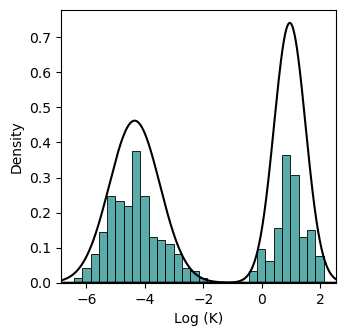

In [1200]:
import scipy
boringen.Kweighted
fig, ax = plt.subplots()
fig.set_size_inches(pix1, pix1)
sns.histplot(boringen.Kweighted, x = 'K', ax = ax, stat = 'density', color = cm(0.5), bins = 30)
x0,x1 = ax.get_xlim()
x_pdf = np.linspace(x0,x1,1000)

boringen.mu1, boringen.std1 = scipy.stats.norm.fit(boringen.Kweighted[boringen.Kweighted['Lithoclass'].isin(boringen.group)]['K'])
y_pdf1 = scipy.stats.norm.pdf(x_pdf, boringen.mu1, boringen.std1)
ax.plot(x_pdf, y_pdf1, c = 'black')
boringen.mu2, boringen.std2 = scipy.stats.norm.fit(boringen.Kweighted[boringen.Kweighted['Lithoclass'].isin(boringen.group) == False]['K'])
y_pdf2 = scipy.stats.norm.pdf(x_pdf, boringen.mu2, boringen.std2)
ax.plot(x_pdf, y_pdf2, c = 'black')
ax.set_xlabel ('Log (K)')
ax.set_xlim(x0,x1)


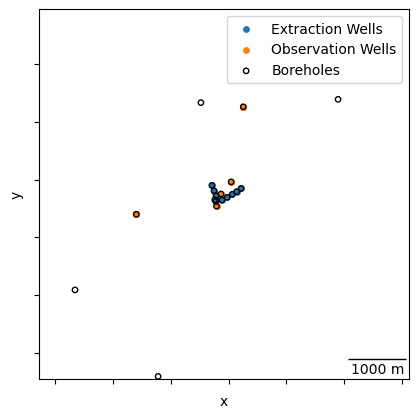

In [1014]:
fig, ax = plt.subplots()
s = 15
marker = 'o'
ax.scatter(x = ExWells.x_coordinaat, y = ExWells.y_coordinaat, label = 'Extraction Wells', s=s, marker = marker, zorder =2)
ax.scatter(ObsWells.x_coordinaat, ObsWells.y_coordinaat, label = 'Observation Wells', s=s, marker = marker, zorder = 3)
ax.scatter(boringen.metadata.loc['X-coordinaat (m)'].astype('float'), boringen.metadata.loc['Y-coordinaat (m)'].astype('float'), ec = 'black',fc = 'none', label = 'Boreholes', s=s,zorder = 4, marker = 'o')
ax.set_xlim(ds.extent[0], ds.extent[1])
ax.set_ylim(ds.extent[2], ds.extent[3])
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_aspect('equal')
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
scalebar = AnchoredSizeBar(ax.transData,
                           1000, '1000 m', 'lower right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=10,
                           )

ax.add_artist(scalebar)

In [1015]:
resultsBetter['combination_count'] = (
    resultsBetter.groupby(['xcorlen', 'zcorlen', 'cc', 'frac'])
    .transform('size')
)
uc = resultsBetter.drop_duplicates(subset=['xcorlen', 'zcorlen', 'cc', 'frac']).reset_index(drop=True)
uc.sort_values('combination_count', inplace = True, ascending = False)
uc[['xcorlen', 'zcorlen', 'cc', 'frac', 'combination_count']].head(20)

xcorlen  zcorlen   cc  frac  combination_count
126     1000      7.5  1.5 -0.05                 34
5        400      7.5  0.5  0.00                 33
3        400      7.5  1.0  0.00                 32
4        400      7.5  0.0  0.00                 32
10       400      7.5  1.0  0.05                 30
69       700      7.5  1.5  0.00                 29
78       700     10.0  1.0  0.00                 29
97       800      7.5  1.5  0.00                 28
38       600      7.5  1.0 -0.05                 28
157     1200      7.5  1.5 -0.05                 28
40       600      7.5  0.5 -0.05                 27
136     1000     10.0  1.5  0.00                 27
21       500      7.5  1.0  0.00                 27
82       700     10.0  1.5  0.05                 27
95       800      7.5  1.5 -0.05                 26
80       700     10.0  0.5  0.00                 26
65       700      7.5  1.0 -0.05                 25
9        400      7.5  1.5  0.05                 25
46       600      7.5  1.5  0.05                 24
24       500      7.5  1.5  0.05                 24

In [1110]:
line

[(165721,
  <xarray.DataArray 'y' ()>
  array(727300.)),
 (172121,
  <xarray.DataArray 'y' ()>
  array(727300.))]

Botm of layer is not equal to top of deeper layer in 63480 cells


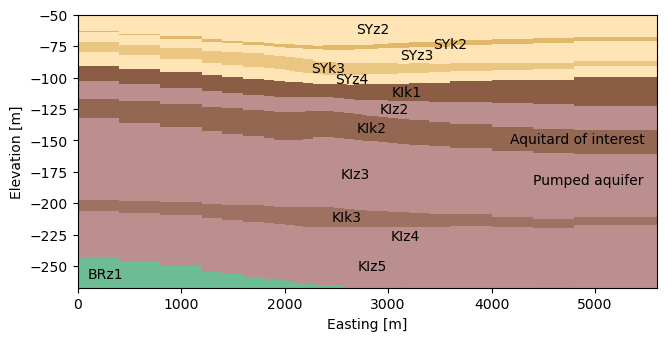

In [1177]:
fig, ax = plt.subplots()
fig.set_size_inches(pix2, pix1)
layer_model = nlmod.read.regis.get_combined_layer_models(ds.extent,
    use_regis=True,
    regis_botm_layer="BRz1",
    use_geotop=False)
modelgrid = nlmod.grid.modelgrid_from_ds(ds)
y = layer_model.y.min() + 3100
line = [(ds.extent[0]+800, y), (ds.extent[1], y)]
dcs = nlmod.plot.DatasetCrossSection(ds, line, zmax =-50, ax = ax )
colors = nlmod.read.regis.get_legend(kind = 'REGIS')
dcs.plot_layers(colors = colors, min_label_area = 1000)
# dcs.plot_grid(vertical=False,horizontal = False, linewidth=0.3)
ax.set_ylabel('Elevation [m]')
ax.set_xlabel('Easting [m]')
ax.text(4400, -185, 'Pumped aquifer', ma = 'right')
ax.text(4175, -152.5, 'Aquitard of interest', ma = 'right')
ax.text(100, -260, 'BRz1', ma = 'right')
ax.set_facecolor('#6cbc96')